In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
import nltk
import re
import string
import subprocess
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install -U nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation
from nltk.corpus import wordnet

In [ ]:
datasets = '/content/drive/MyDrive/datasets/'

In [ ]:
books_rating_path = datasets + 'Books_rating.csv'
books_data_path = datasets + 'books_data.csv'

book_rating = pd.read_csv(books_rating_path)
book_data = pd.read_csv(books_data_path)

In [ ]:
book_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
book_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


**Data Pre-Processing**

In [ ]:
books = pd.merge(book_rating,book_data, on = 'Title')
books.shape

df = books[['Title','review/score','review/text','authors','categories','ratingsCount']]

df.drop_duplicates(inplace = True)
df.shape

df.isna().sum()

df.dropna(inplace = True)
df.isna().sum()

df.info()

df.shape

<ipython-input-15-1ed62d600c89>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)
<ipython-input-15-1ed62d600c89>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


(1325891, 6)

In [ ]:
data = df.sample(20000)
data.shape

(20000, 6)

In [ ]:
columns_to_extract = ['authors', 'categories']

extraction_pattern = r'\'(.*)\''

for column in columns_to_extract:
    data[column] = data[column].str.extract(extraction_pattern)

data['word_count'] = data['review/text'].str.split().apply(len)

In [ ]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
18957,Forward the Mage,4.0,Eric Flint has become an established SF Author...,"Eric Flint', 'Richard Roach",Comics & Graphic Novels,2.0,92
296172,Scientific Progress Goes 'Boink': A Calvin and...,5.0,Bill Waterson is argudably one of the best com...,Bill Watterson,Comics & Graphic Novels,24.0,211
2257816,Casting a Spell: The Bamboo Fly Rod and the Am...,3.0,The topic has started to catch my eye when I t...,George Black,Sports & Recreation,2.0,171
1513937,Blood and Gold: The Vampire Marius (The Vampir...,5.0,"I love Rice's books, but this one is for me th...",Anne Rice,Fiction,2.0,102
1582622,The Red Tent (Bestselling Backlist),3.0,I had great hopes for this book after being en...,Anita Diamant,Fiction,3653.0,202


**Exploratory data analysis**

In [ ]:
import plotly.express as px

top_categories_count = data['categories'].value_counts().head(10)

fig = px.pie(data_frame=top_categories_count.reset_index(), names='index', values='categories',
             title='Distribution of Books Based on Genre', hole=0.3)

fig.update_traces(textinfo='percent+label', pull=[0.1] + [0]*(len(top_categories_count)-1))
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

fig.show()

**Most frequent Words in over 4 rated Reviews**

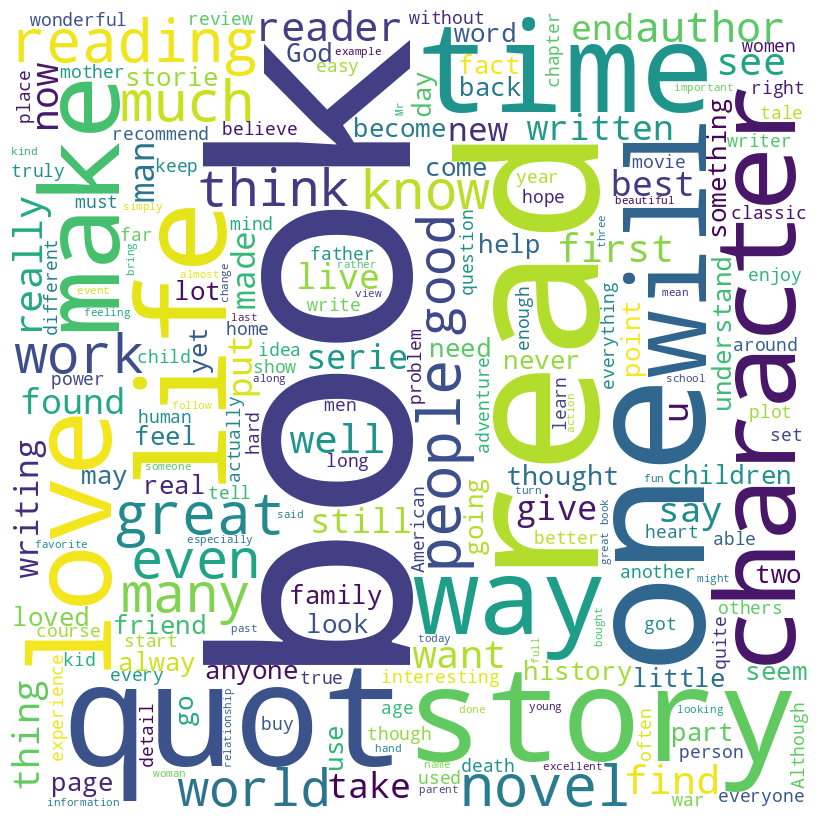

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=800, min_font_size=10, background_color='white')

positive_reviews_text = data[data['review/score'] > 4]['review/text'].str.cat(sep=" ")

positive_reviews_wc = wc.generate(positive_reviews_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(positive_reviews_wc, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


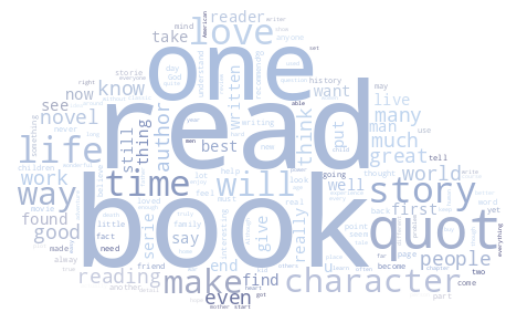

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from io import BytesIO
import requests

text = data[data['review/score'] > 4]['review/text'].str.cat(sep=" ")

# From URL
response = requests.get("https://365psd.com/images/istock/previews/1004/100424327-vector-cloud-icon.jpg")
mask = np.array(Image.open(BytesIO(response.content)))

# Colors
image_colors = ImageColorGenerator(mask)

wc = WordCloud(background_color = "white", repeat = True, mask = mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc.recolor(color_func=image_colors), interpolation = "bilinear")

plt.show()




**Readers give both positive and negative ratings across different genres, reflecting diverse preferences and tastes.**

<ipython-input-21-4597c78fa765>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-4597c78fa765>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




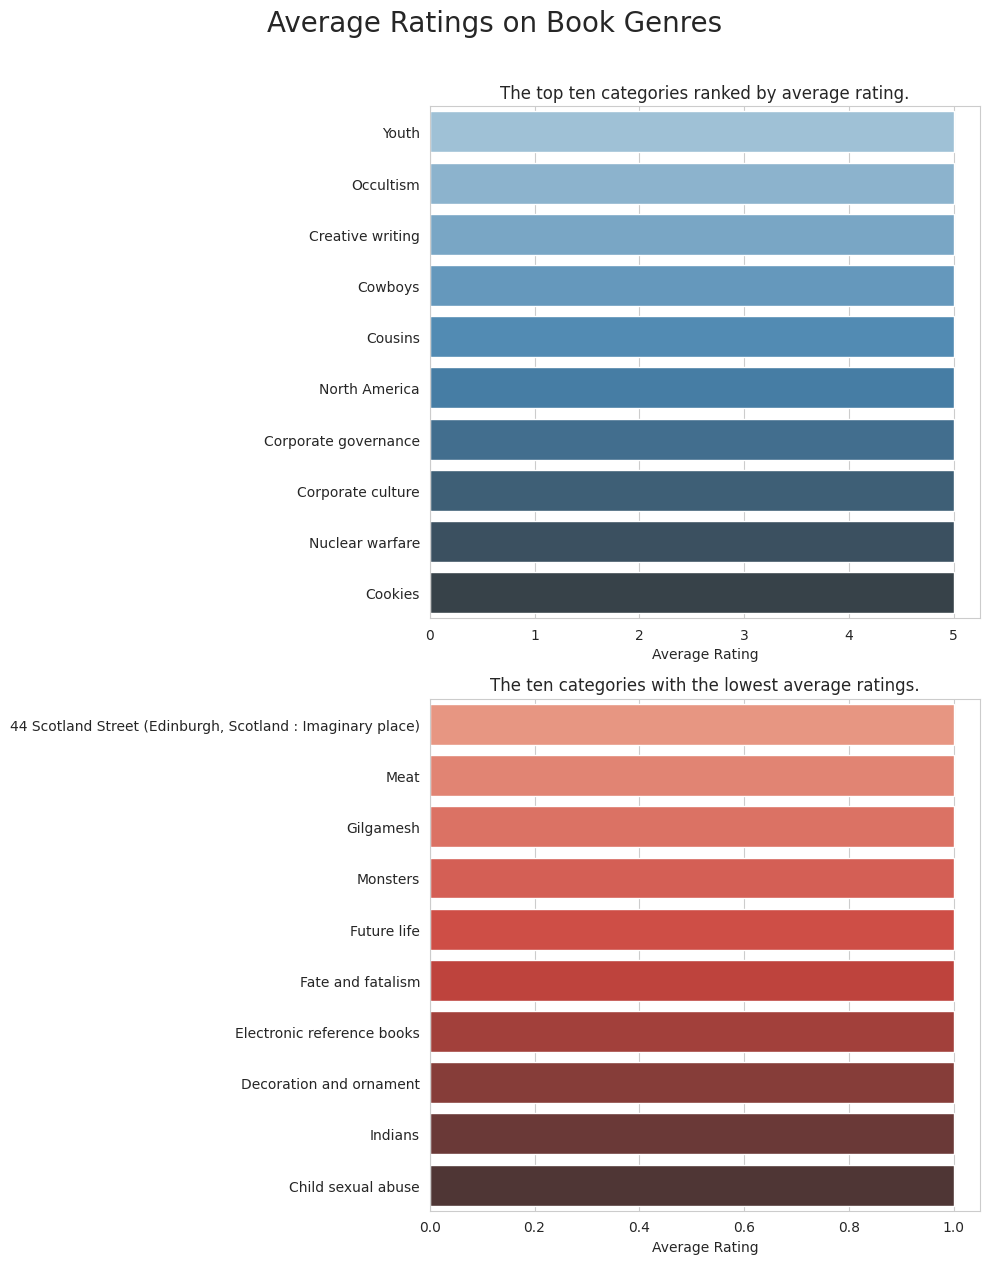

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

numeric_data = data.dropna(subset=['review/score'])

avg_cat_rating = numeric_data.groupby('categories')['review/score'].mean().sort_values(ascending=False).head(10)
avg_cat_rating_d = numeric_data.groupby('categories')['review/score'].mean().sort_values().head(10)

sns.barplot(x=avg_cat_rating, y=avg_cat_rating.index, palette="Blues_d", ax=axes[0])
axes[0].set_title('The top ten categories ranked by average rating.')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('')

sns.barplot(x=avg_cat_rating_d, y=avg_cat_rating_d.index, palette="Reds_d", ax=axes[1])
axes[1].set_title('The ten categories with the lowest average ratings.')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('')

plt.tight_layout()

plt.suptitle('Average Ratings on Book Genres', fontsize=20, y=1.05)

plt.show()


**Sentiment Analysis**

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
data['clean_reviews'] = data['review/text'].str.lower()
data['score'] = data['clean_reviews'].apply(lambda review: analyzer.polarity_scores(review))

In [ ]:
data['compound'] = data['review/text'].apply(lambda review: analyzer.polarity_scores(review.lower())['compound'])


In [ ]:
data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')


If the compound value exceeds 0.05, it's considered positive. If the compound value is below -0.05, it's considered negative. If the compound value equals 0.0, it's considered neutral.

In [ ]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,clean_reviews,score,compound,Sentiment
18957,Forward the Mage,4.0,Eric Flint has become an established SF Author...,"Eric Flint', 'Richard Roach",Comics & Graphic Novels,2.0,92,eric flint has become an established sf author...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.8658,positive
296172,Scientific Progress Goes 'Boink': A Calvin and...,5.0,Bill Waterson is argudably one of the best com...,Bill Watterson,Comics & Graphic Novels,24.0,211,bill waterson is argudably one of the best com...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.9960,positive
2257816,Casting a Spell: The Bamboo Fly Rod and the Am...,3.0,The topic has started to catch my eye when I t...,George Black,Sports & Recreation,2.0,171,the topic has started to catch my eye when i t...,"{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'comp...",0.9468,positive
1513937,Blood and Gold: The Vampire Marius (The Vampir...,5.0,"I love Rice's books, but this one is for me th...",Anne Rice,Fiction,2.0,102,"i love rice's books, but this one is for me th...","{'neg': 0.079, 'neu': 0.636, 'pos': 0.285, 'co...",0.9862,positive
1582622,The Red Tent (Bestselling Backlist),3.0,I had great hopes for this book after being en...,Anita Diamant,Fiction,3653.0,202,i had great hopes for this book after being en...,"{'neg': 0.041, 'neu': 0.775, 'pos': 0.184, 'co...",0.9780,positive


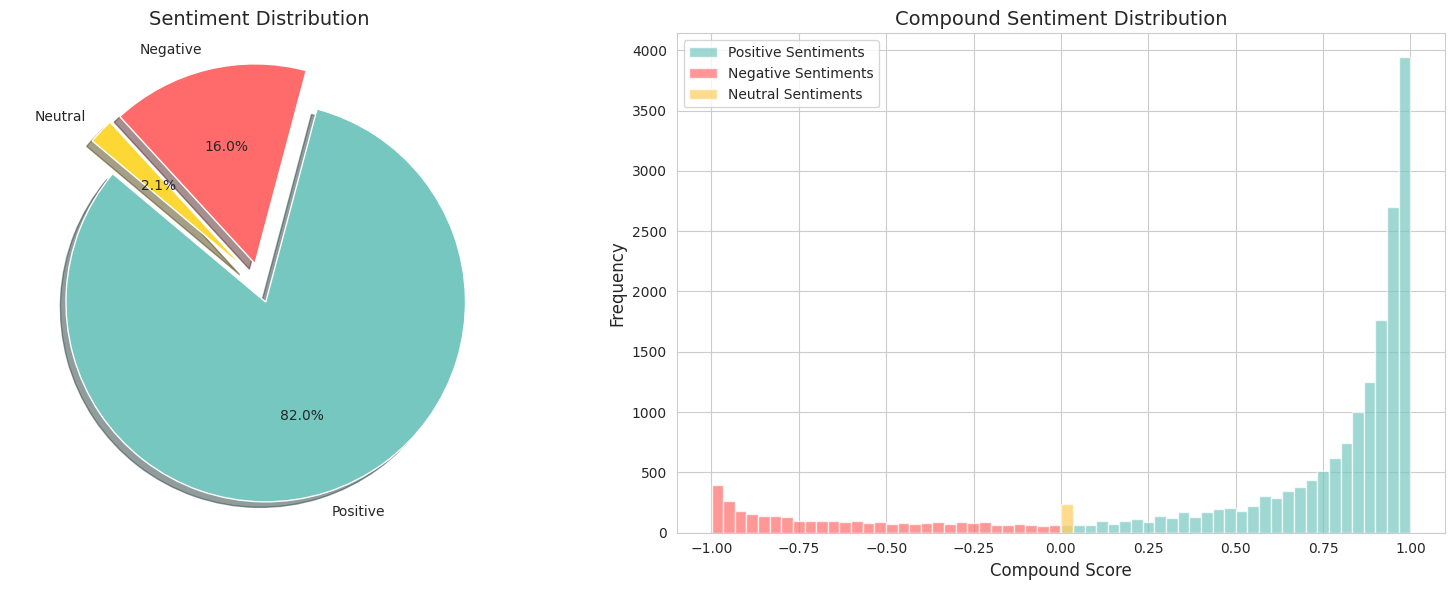

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

labels = ['Positive', 'Negative', 'Neutral']
sizes = data['Sentiment'].value_counts()
colors = ['#76c7c0', '#ff6b6b', '#fdd835']
explode = (0.1, 0.1, 0.1)

ax[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax[0].set_title('Sentiment Distribution', fontsize=14)

colors = ['#76c7c0', '#ff6b6b', '#ffcc5c']
bins = 30

ax[1].hist(data[data['compound'] > 0]['compound'], bins=bins, color=colors[0], alpha=0.7, label='Positive Sentiments')
ax[1].hist(data[data['compound'] < 0]['compound'], bins=bins, color=colors[1], alpha=0.7, label='Negative Sentiments')
ax[1].hist(data[data['compound'] == 0]['compound'], bins=bins, color=colors[2], alpha=0.7, label='Neutral Sentiments')

ax[1].set_title('Compound Sentiment Distribution', fontsize=14)
ax[1].set_xlabel('Compound Score', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].legend()

plt.tight_layout()

plt.show()


<ipython-input-28-09a3674cb9b7>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




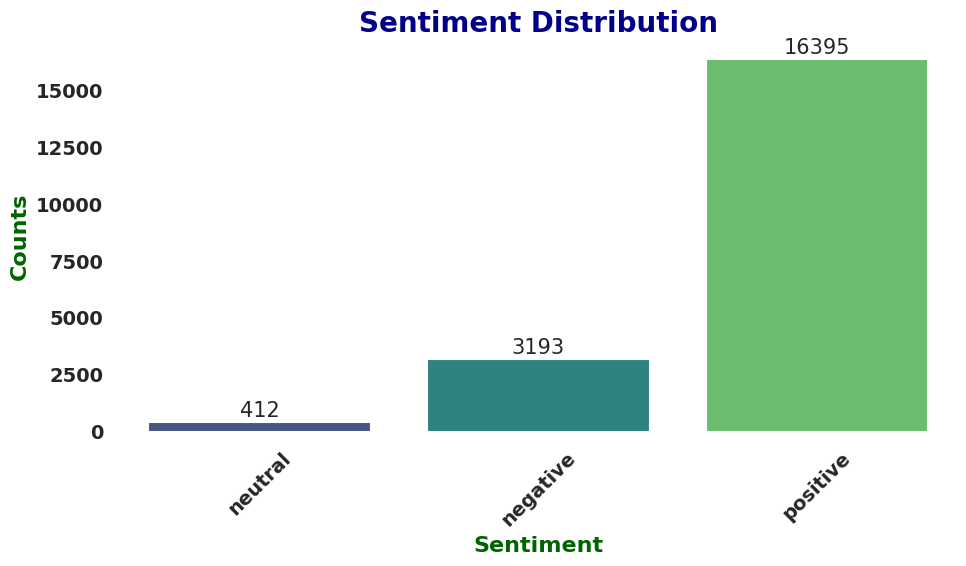

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel", context="talk")

sentiment_counts = data['Sentiment'].value_counts().sort_values()

fig, ax = plt.subplots(figsize=(10, 6))

bars = sns.barplot(x=sentiment_counts.index, y=sentiment_counts, ax=ax, palette="viridis")

ax.set_title('Sentiment Distribution', fontsize=20, fontweight='bold', color='darkblue')
ax.set_xlabel('Sentiment', fontsize=16, fontweight='bold', color='darkgreen')
ax.set_ylabel('Counts', fontsize=16, fontweight='bold', color='darkgreen')

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

sns.despine(left=True, bottom=True)
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(False)
plt.tight_layout()

# Show plot
plt.show()


**DataFrame comparing Reviews and Sentiments**

In [ ]:
reviews_df = data[['clean_reviews', 'Sentiment']]


In [ ]:
reviews_df.head(50)

,clean_reviews,Sentiment
18957,eric flint has become an established sf author...,positive
296172,bill waterson is argudably one of the best com...,positive
2257816,the topic has started to catch my eye when i t...,positive
1513937,"i love rice's books, but this one is for me th...",positive
1582622,i had great hopes for this book after being en...,positive
2879942,do you work or live with a tyrant? got a spoil...,positive
2605606,another great book in the series. i powered th...,positive
277651,this is a short read and listed as ya but don'...,negative
1698668,the story of &quot;the house of seven gables&q...,positive
787046,this book helpss you stop and take a look at y...,neutral


In [ ]:
x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

**Text Normalization and Preprocessing**

In [ ]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [ ]:
stopword = {word.lower() for word in stopword}

url_pattern = re.compile(r'http\S+')
special_chars_pattern = re.compile(r'[^a-zA-Z0-9\s]')

lemmatizer = WordNetLemmatizer()

def clean(text):
    text = url_pattern.sub('', text)

    text = special_chars_pattern.sub('', text)

    words = text.split()
    lemmatized_and_filtered = [
        lemmatizer.lemmatize(word.lower()) for word in words
        if word.lower() not in stopword and word.isalpha()
    ]

    final_text = " ".join(lemmatized_and_filtered)

    return final_text


In [ ]:
x["clean_reviews"] = x["clean_reviews"].apply(clean)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [ ]:
x_train.head()

,clean_reviews
21704,book came paperback gradethe teacher tried pus...
2266952,although controversy exists treatment famous m...
2979066,page turner could one great adventure another ...
81180,something small easily moved requires special ...
230151,nonscientist writes book peer review come inde...


In [ ]:
y_train.head()

21704      positive
2266952    positive
2979066    positive
81180      positive
230151     negative
Name: Sentiment, dtype: object

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df =  pd.DataFrame(x_test_tfidf.toarray())

In [ ]:
oversample = SMOTE()

In [ ]:
x_train_bal, y_train_bal = oversample.fit_resample(x_train_tfidf, y_train)

In [ ]:
x_test_bal, y_test_bal = oversample.fit_resample(x_test_tfidf, y_test)

In [ ]:
# Logistic Regression
log_model = LogisticRegression()
train_and_evaluate(LogisticRegression(), x_train_tfidf_df, y_train, x_test_tfidf_df, y_test, 'Logistic Regression', 'Imbalanced')
train_and_evaluate(LogisticRegression(), x_train_bal, y_train_bal, x_test_bal, y_test_bal, 'Logistic Regression', 'Balanced')

# Decision Tree
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=45)
train_and_evaluate(tree_model, x_train_tfidf_df, y_train, x_test_tfidf_df, y_test, 'Decision Tree', 'Imbalanced')
train_and_evaluate(tree_model, x_train_bal, y_train_bal, x_test_bal, y_test_bal, 'Decision Tree', 'Balanced')

# Naive Bayes
def train_and_evaluate_nb(x_train, y_train, x_test, y_test, data_type='Imbalanced'):
    if hasattr(x_train, "toarray"): x_train = x_train.toarray()
    if hasattr(x_test, "toarray"): x_test = x_test.toarray()

    nb_model = GaussianNB()
    train_and_evaluate(nb_model, x_train, y_train, x_test, y_test, 'Naive Bayes', data_type)

train_and_evaluate_nb(x_train_tfidf_df, y_train, x_test_tfidf_df, y_test, 'Imbalanced')
train_and_evaluate_nb(x_train_bal, y_train_bal, x_test_bal, y_test_bal, 'Balanced')

# RandomForest
rf_model = RandomForestClassifier(n_estimators=100)
train_and_evaluate(rf_model, x_train_tfidf_df, y_train, x_test_tfidf_df, y_test, 'RandomForest', 'Imbalanced')
train_and_evaluate(rf_model, x_train_bal, y_train_bal, x_test_bal, y_test_bal, 'RandomForest', 'Balanced')

In [ ]:
perd_log_bal =log_bal.predict(x_test_bal)


In [ ]:
print(classification_report(perd_log_bal, y_test_bal))

In [ ]:
def predict(text,model):
  input_text = [text]
  text_to_vec = tfidf_vectorizer.transform(input_text).toarray()
  prediction = model.predict(text_to_vec)
  return prediction

In [ ]:
input = "The whole game was a rollercoaster ride, but Los Angeles Lakers ultimately persevered and won!"
output = predict(input,log_bal)
print(output)

In [ ]:
!pip install tensorflow
!pip install transformers


In [ ]:
!pip install tensorflow transformers --upgrade
!pip install -U tensorflow==2.10

In [ ]:
x = data['clean_reviews']
y = data['Sentiment']


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25, random_state=42)

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

max_length = max([len(s.split()) for s in x_train])
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

x_train_padded = pad_sequences(x_train_sequences, maxlen=max_length, padding='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_length, padding='post')

model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dense(24, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

model.fit(x_train_padded, y_train, epochs=5, validation_data=(x_test_padded, y_test))

bert_model = TFAutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_classes)
bert_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

train_encodings = bert_tokenizer(x_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = bert_tokenizer(x_test.tolist(), truncation=True, padding=True, max_length=128)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(16)

bert_model.compile(optimizer=tf.optimizers.Adam(learning_rate=5e-5),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

bert_model.fit(train_dataset, epochs=3, validation_data=test_dataset)


In [ ]:
import pickle

model_filename = "model.pkl"

with open(model_filename, 'wb') as file:
    pickle.dump(bert_model, file)

print(f"Model saved to {model_filename}")